In [34]:
import pandas as pd
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt
import numpy as np

In [35]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.47092, 12.31168, tidszone, 10, "Danmarks Tekniske Universitet (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Højde er ca 50 m MOH

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)

In [36]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-01 00:00:00+02:00,117.972773,117.972773,-27.972773,-27.972773,338.837454,-3.866396
2024-04-01 00:01:00+02:00,118.023360,118.023360,-28.023360,-28.023360,339.113851,-3.866190
2024-04-01 00:02:00+02:00,118.073307,118.073307,-28.073307,-28.073307,339.390526,-3.865984
2024-04-01 00:03:00+02:00,118.122613,118.122613,-28.122613,-28.122613,339.667477,-3.865777
2024-04-01 00:04:00+02:00,118.171276,118.171276,-28.171276,-28.171276,339.944700,-3.865571


Plot solens zenit-, azimut- og elevationsvinkel, dvs. 
, for hele dagen den 20. april 2024 som funktion af tiden:

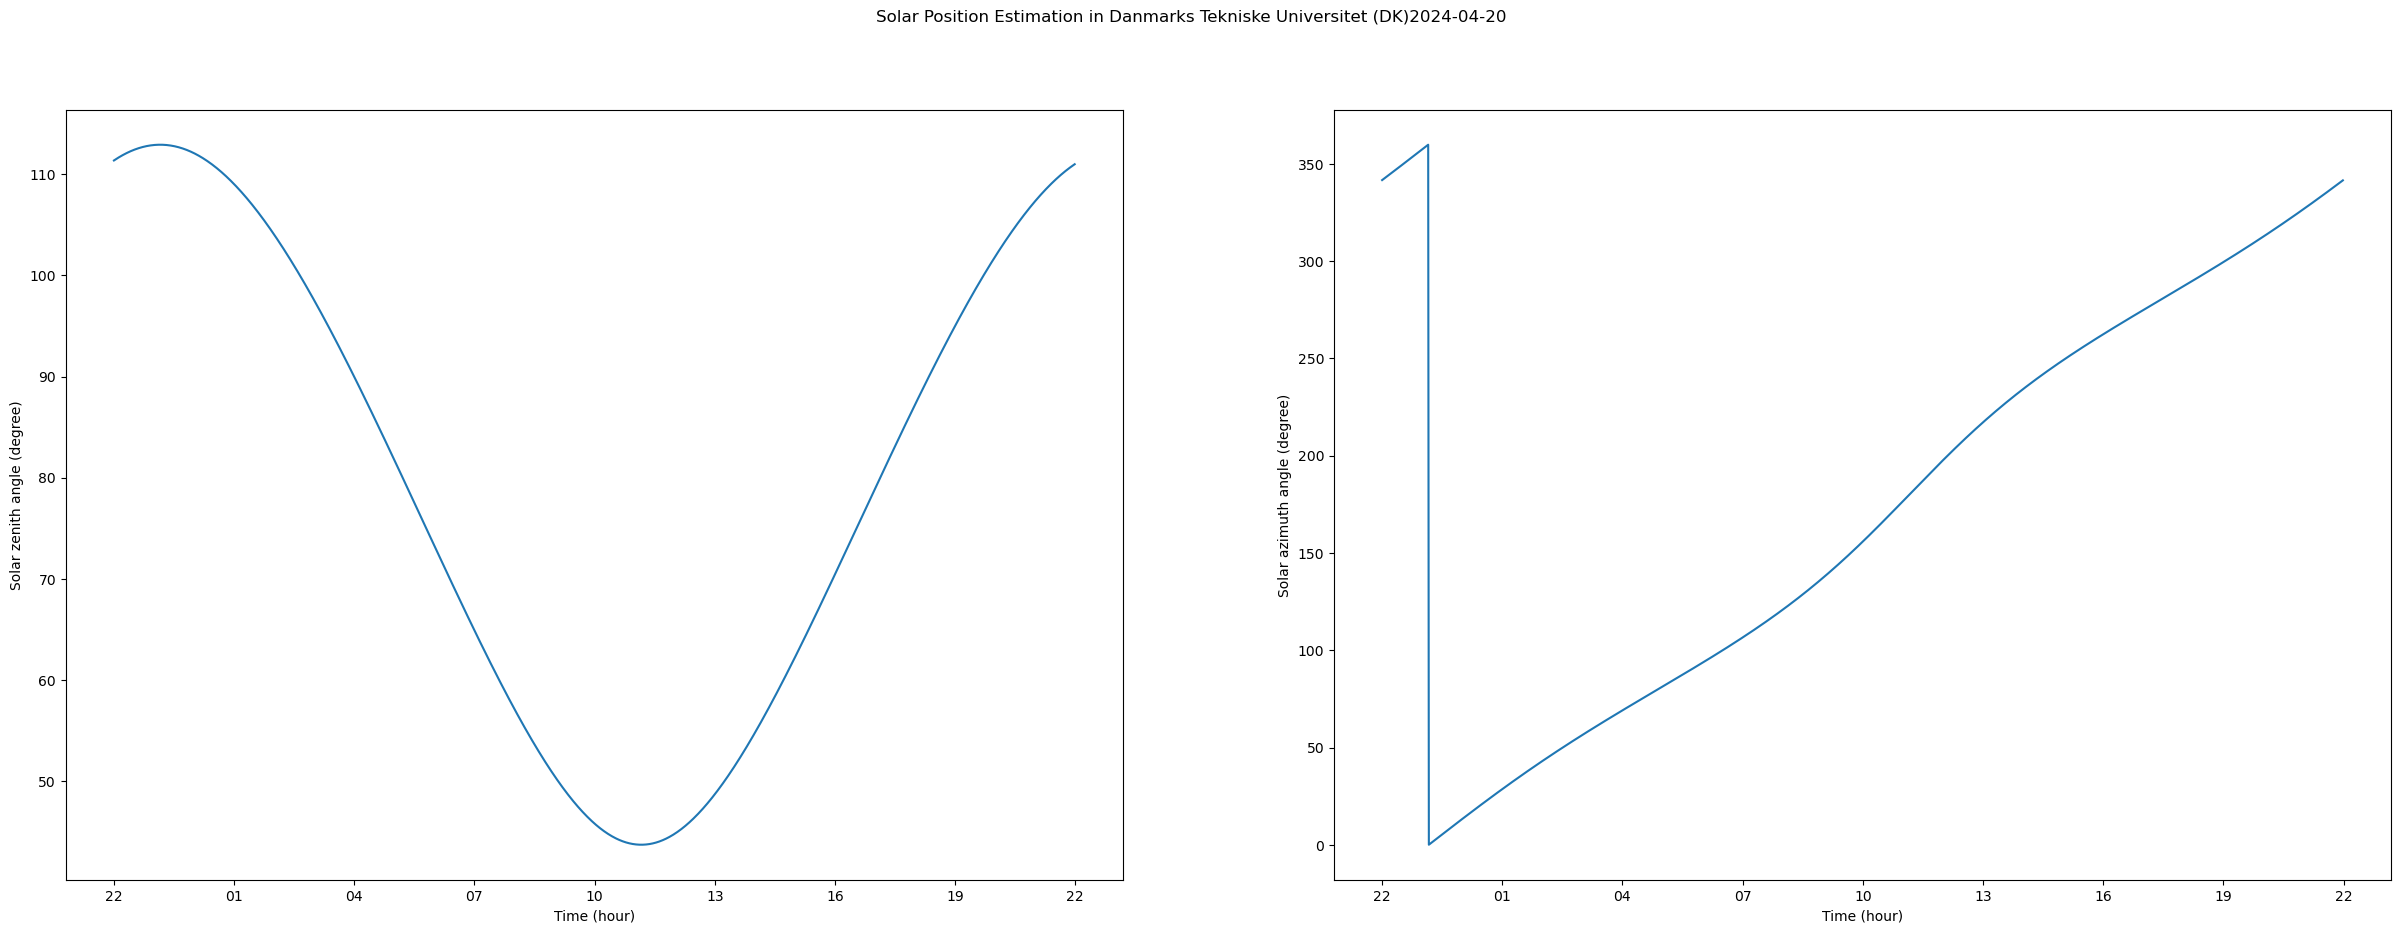

In [37]:
import matplotlib.dates as mdates

valgt_dato = "2024-04-20"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

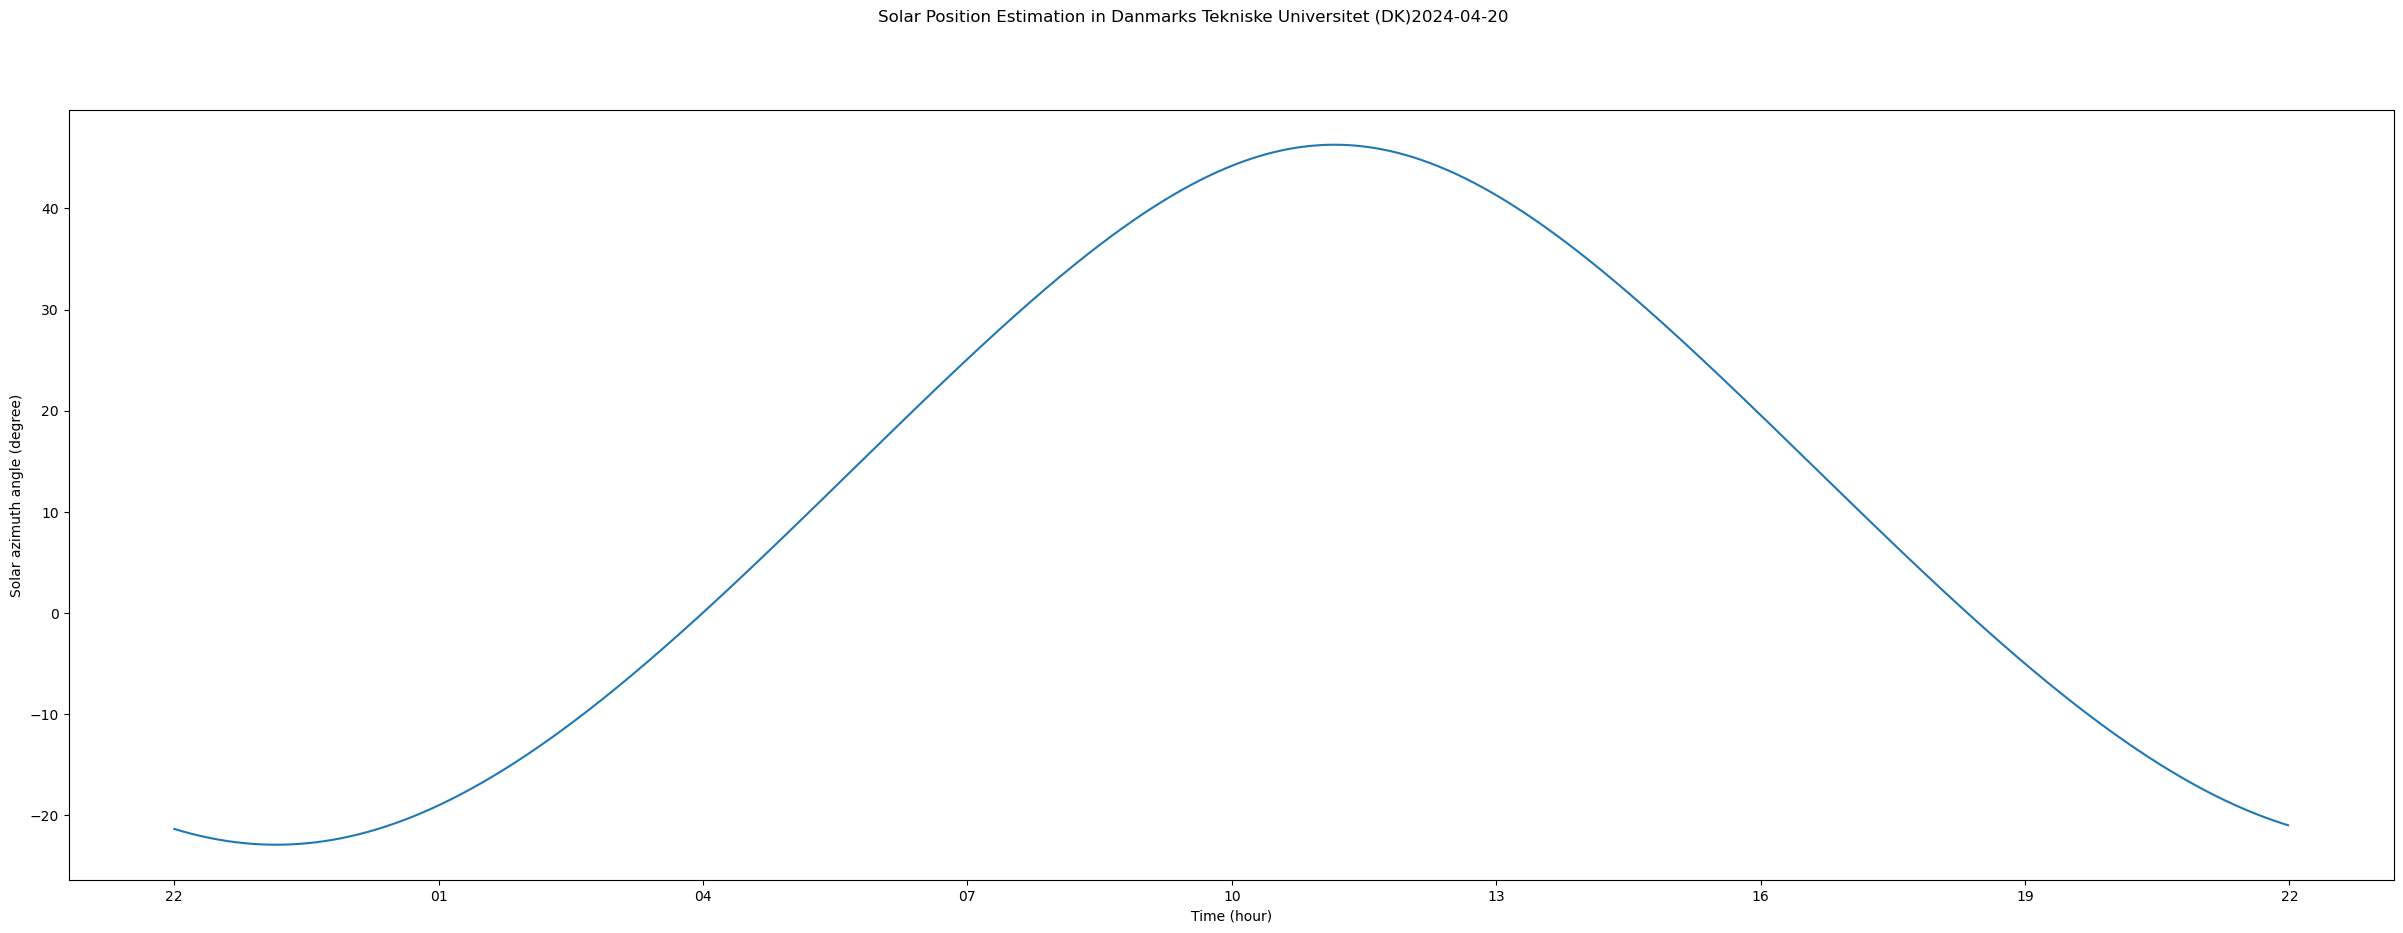

In [38]:
# Plots for elevationsvinkel
fig, (ax3) = plt.subplots(1, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for elevationsvinkel
ax3.plot(solpos.loc[valgt_dato].elevation)
ax3.set_ylabel("Solar azimuth angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [39]:
valgt_dato = "2024-04-20"
print(solpos.loc[valgt_dato].zenith)
print(solpos.loc[valgt_dato].elevation)
print(solpos.loc[valgt_dato].azimuth)

2024-04-20 00:00:00+02:00    111.369868
2024-04-20 00:01:00+02:00    111.413961
2024-04-20 00:02:00+02:00    111.457446
2024-04-20 00:03:00+02:00    111.500321
2024-04-20 00:04:00+02:00    111.542585
                                ...    
2024-04-20 23:55:00+02:00    110.816058
2024-04-20 23:56:00+02:00    110.862889
2024-04-20 23:57:00+02:00    110.909120
2024-04-20 23:58:00+02:00    110.954749
2024-04-20 23:59:00+02:00    110.999775
Freq: min, Name: zenith, Length: 1440, dtype: float64
2024-04-20 00:00:00+02:00   -21.369868
2024-04-20 00:01:00+02:00   -21.413961
2024-04-20 00:02:00+02:00   -21.457446
2024-04-20 00:03:00+02:00   -21.500321
2024-04-20 00:04:00+02:00   -21.542585
                               ...    
2024-04-20 23:55:00+02:00   -20.816058
2024-04-20 23:56:00+02:00   -20.862889
2024-04-20 23:57:00+02:00   -20.909120
2024-04-20 23:58:00+02:00   -20.954749
2024-04-20 23:59:00+02:00   -20.999775
Freq: min, Name: elevation, Length: 1440, dtype: float64
2024-04-20 00:00:00+

##### Anbefales at arbejde i numpy arrays derfor:

In [40]:
np.array(solpos.loc[valgt_dato].elevation)

array([-21.36986766, -21.41396137, -21.45744637, ..., -20.90912019,
       -20.95474934, -20.99977543])

**Plot solens elevationsvinkel og find ud af hvornår på dagen solen står højest den 20. april 2024.**  
Forklar hvad det betyder når α_s < 0 eller θ_s > 90°.

In [ ]:
#testtesttesttesttesttesttesttest

**Find tidspunktet for solopgang og solnedgang på DTU den 20. april 2024.**  
Sammenlign med “kendte” værdier fx fra DMI.